#Regression
created by: Ari Sulistiyo Prabowo

**Objective:** learning regression model to everyone starting from the simple

**What will you learn:**
1. Simple linear regression
2. Polynomial regression
3. Tree based regression
4. Lasso regression
5. Ridge regression
6. Elastic-net regression



In [ ]:
#import library
import pandas as pd
import numpy as np

#import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#import ML model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn import tree

#import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# insurance
insurance = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/insurance.csv")
print("Diabetes data contain {} rows and {} columns \n".format(insurance.shape[0], insurance.shape[1]))
print(insurance.info(), '\n')
display(insurance.describe())
insurance.head()

Diabetes data contain 1338 rows and 7 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None 



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis

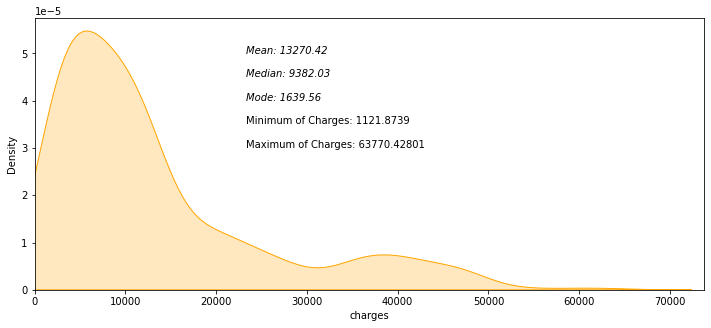

In [ ]:
# perform the distribution of charges
fig, ax = plt.subplots(figsize=(12,5))
sns.distplot(insurance["charges"], color='orange', kde_kws={'shade':True}, hist=False,
             bins=10, ax=ax)

ax.text(insurance['charges'].mean() + 10000, 0.00005, "Mean: "+ str(round(insurance['charges'].mean(),2)), style='italic', fontsize=10)
ax.text(insurance['charges'].mean() + 10000, 0.000045, "Median: "+ str(round(insurance['charges'].median(),2)), style='italic', fontsize=10)
ax.text(insurance['charges'].mean() + 10000, 0.00004, "Mode: "+ str(round(insurance['charges'].mode()[0],2)), style='italic', fontsize=10)
ax.text(insurance['charges'].mean() + 10000, 0.000035, "Minimum of Charges: " + str(insurance['charges'].min()))
ax.text(insurance['charges'].mean() + 10000, 0.00003, "Maximum of Charges: " + str(insurance['charges'].max()))
plt.xlim([0, insurance['charges'].max()+10000])
plt.show()

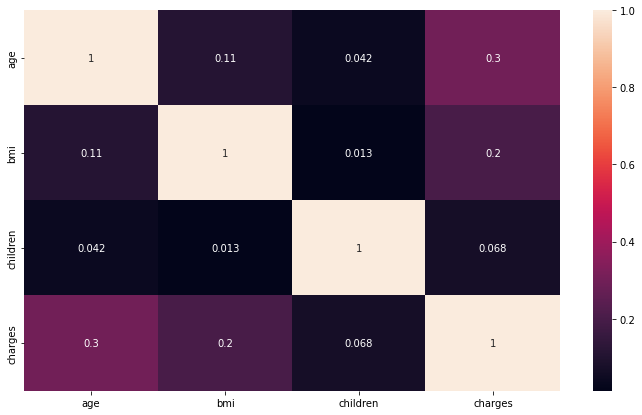

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(insurance.corr(), annot=True)
plt.show()

## Data Preprocessing
Apply label encoder or one-hot encoder

In [ ]:
def label_encoding(data):
  """
  Let's encode the non_numerical data into a numerical value
  data: your dataset
  """
  
  data_new = data.copy()

  #find non numerical variable/field
  object_data = data_new.select_dtypes(include=['object']).columns.to_list()

  #label encoder object
  label_encoding = LabelEncoder()

  #encode the data into a label
  for i in object_data:
    data_new[i] = label_encoding.fit_transform(data_new[i])

  return data_new

In [ ]:
data_label_enc = label_encoding(insurance)
data_label_enc

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## `1.` Simple Linear Regression

In [ ]:
def benchmark(data, target, model):

  data_label_enc = label_encoding(data)

  X = data_label_enc.drop(columns=target)
  y = data_label_enc[target]

  #splitting data into training and testing data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

  #modelling
  lr = model
  lr.fit(X_train, y_train)

  y_train_pred = lr.predict(X_train)
  y_test_pred = lr.predict(X_test)

  print('For training data ---------')
  print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_train, y_train_pred)))
  print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_train, y_train_pred)))
  print("R2 Score: {:.2f} \n".format(r2_score(y_train, y_train_pred)))

  print('For testing data ---------')
  print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_test, y_test_pred)))
  print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_test_pred)))
  print("R2 Score: {:.2f}".format(r2_score(y_test, y_test_pred)))

In [ ]:
def print_coef(data, target, model):

  data_label_enc = label_encoding(data)

  X = data_label_enc.drop(columns=target)
  y = data_label_enc[target]

  #splitting data into training and testing data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

  #modelling
  lr = model
  lr.fit(X_train, y_train)

  return lr.coef_

In [ ]:
def ploting_the_coef(data, target, model):
  
  coef = print_coef(data, target, model)

  reg_coef = pd.DataFrame()
  reg_coef['columns'] = data.drop(target, axis=1).columns.to_list()
  reg_coef['coefficient'] = pd.Series(coef)
  display(reg_coef)
  
  fig, ax = plt.subplots(figsize=(12,7))
  ax.bar(reg_coef['columns'], reg_coef['coefficient'])

  ax.spines['bottom'].set_position('zero')

  plt.style.use('ggplot')
  plt.show()

In [ ]:
benchmark(insurance, target='charges', model=LinearRegression())

For training data ---------
Mean Absolute Error: 4021.81
Mean Squared Error: 34956623.67
R2 Score: 0.76 

For testing data ---------
Mean Absolute Error: 4476.48
Mean Squared Error: 43047481.54
R2 Score: 0.69


## `2.` Polynomial Regression

In [ ]:
def model_poly(data, target, model):

  data_label_enc = label_encoding(data)

  X = data_label_enc.drop(columns=target)
  y = data_label_enc[target]

  for i in list(range(2,6)):
    pol = PolynomialFeatures(degree=i)
    x_pol = pol.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.3, random_state=43)

    plr = model
    plr.fit(X_train, y_train)

    y_train_pred = plr.predict(X_train)
    y_test_pred = plr.predict(X_test)

    print("Degree",i)
    print('For training data ---------')
    print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_train, y_train_pred)))
    print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_train, y_train_pred)))
    print("R2 Score: {:.2f} \n".format(r2_score(y_train, y_train_pred)))

    print('For testing data ---------')
    print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y_test, y_test_pred)))
    print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_test_pred)))
    print("R2 Score: {:.2f} \n".format(r2_score(y_test, y_test_pred)))

In [ ]:
model_poly(insurance, target='charges', model=LinearRegression())

Degree 2
For training data ---------
Mean Absolute Error: 2591.03
Mean Squared Error: 19814148.04
R2 Score: 0.86 

For testing data ---------
Mean Absolute Error: 3248.78
Mean Squared Error: 29636036.28
R2 Score: 0.82 

Degree 3
For training data ---------
Mean Absolute Error: 2478.37
Mean Squared Error: 18452861.38
R2 Score: 0.87 

For testing data ---------
Mean Absolute Error: 3172.15
Mean Squared Error: 29991442.92
R2 Score: 0.82 

Degree 4
For training data ---------
Mean Absolute Error: 2377.81
Mean Squared Error: 16703360.15
R2 Score: 0.88 

For testing data ---------
Mean Absolute Error: 3536.84
Mean Squared Error: 33453142.07
R2 Score: 0.80 

Degree 5
For training data ---------
Mean Absolute Error: 2183.84
Mean Squared Error: 13350815.04
R2 Score: 0.90 

For testing data ---------
Mean Absolute Error: 4799.30
Mean Squared Error: 77387187.01
R2 Score: 0.53 



## `3.` Tree based regression

In [ ]:
benchmark(insurance, target='charges', model=DecisionTreeRegressor())

For training data ---------
Mean Absolute Error: 29.57
Mean Squared Error: 244239.55
R2 Score: 1.00 

For testing data ---------
Mean Absolute Error: 3548.67
Mean Squared Error: 48661852.60
R2 Score: 0.65


In [ ]:
model_poly(insurance, target='charges', model=DecisionTreeRegressor())

Degree 2
For training data ---------
Mean Absolute Error: 20.45
Mean Squared Error: 195722.35
R2 Score: 1.00 

For testing data ---------
Mean Absolute Error: 3323.30
Mean Squared Error: 47022799.53
R2 Score: 0.71 

Degree 3
For training data ---------
Mean Absolute Error: 20.45
Mean Squared Error: 195722.35
R2 Score: 1.00 

For testing data ---------
Mean Absolute Error: 2945.86
Mean Squared Error: 39916672.78
R2 Score: 0.76 

Degree 4
For training data ---------
Mean Absolute Error: 20.45
Mean Squared Error: 195722.35
R2 Score: 1.00 

For testing data ---------
Mean Absolute Error: 2961.83
Mean Squared Error: 39976732.05
R2 Score: 0.76 

Degree 5
For training data ---------
Mean Absolute Error: 20.45
Mean Squared Error: 195722.35
R2 Score: 1.00 

For testing data ---------
Mean Absolute Error: 2704.94
Mean Squared Error: 34808515.65
R2 Score: 0.79 



____

In [ ]:
boston = pd.read_csv('https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/boston_house.csv')
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#apply linear regression
benchmark(boston, target='House Price', model=LinearRegression())

For training data ---------
Mean Absolute Error: 3.29
Mean Squared Error: 21.99
R2 Score: 0.73 

For testing data ---------
Mean Absolute Error: 3.27
Mean Squared Error: 21.90
R2 Score: 0.76


,columns,coefficient
0,Unnamed: 0,-0.002119
1,CRIM,-0.083852
2,ZN,0.050587
3,INDUS,0.007044
4,CHAS,2.773049
5,NOX,-18.871459
6,RM,3.417281
7,AGE,0.008107
8,DIS,-1.468010
9,RAD,0.312809


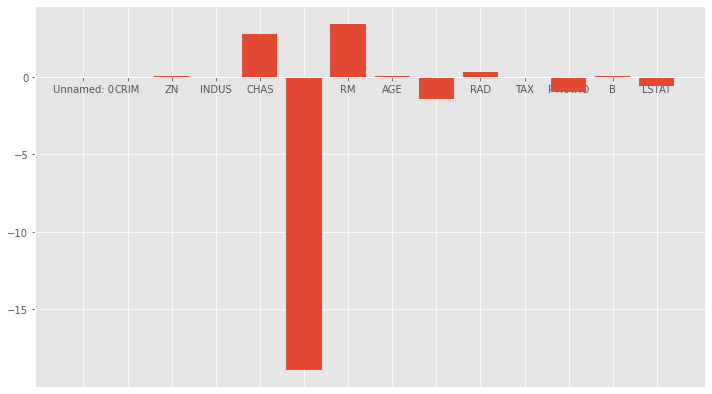

In [ ]:
ploting_the_coef(boston, target='House Price', model=LinearRegression())

## `4.` Lasso Regression

In [ ]:
#apply linear regression
benchmark(boston, target='House Price', model=Lasso(alpha=1))

For training data ---------
Mean Absolute Error: 3.62
Mean Squared Error: 27.08
R2 Score: 0.67 

For testing data ---------
Mean Absolute Error: 3.80
Mean Squared Error: 29.82
R2 Score: 0.68


,columns,coefficient
0,Unnamed: 0,-0.000451
1,CRIM,-0.040987
2,ZN,0.057805
3,INDUS,-0.000000
4,CHAS,0.000000
5,NOX,-0.000000
6,RM,0.596688
7,AGE,0.032822
8,DIS,-0.574634
9,RAD,0.282282


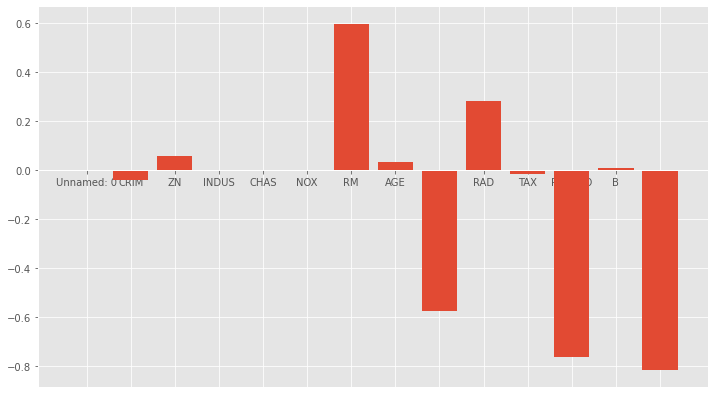

In [ ]:
ploting_the_coef(boston, target='House Price', model=Lasso(alpha=1))

## `5.` Ridge Regression

In [ ]:
benchmark(insurance, target='charges', model=Ridge(alpha=1))

For training data ---------
Mean Absolute Error: 4031.08
Mean Squared Error: 34959693.77
R2 Score: 0.76 

For testing data ---------
Mean Absolute Error: 4486.61
Mean Squared Error: 43017731.17
R2 Score: 0.69


,columns,coefficient
0,Unnamed: 0,-0.002459
1,CRIM,-0.078370
2,ZN,0.052717
3,INDUS,-0.030599
4,CHAS,2.667043
5,NOX,-10.350207
6,RM,3.459364
7,AGE,0.000007
8,DIS,-1.354219
9,RAD,0.297875


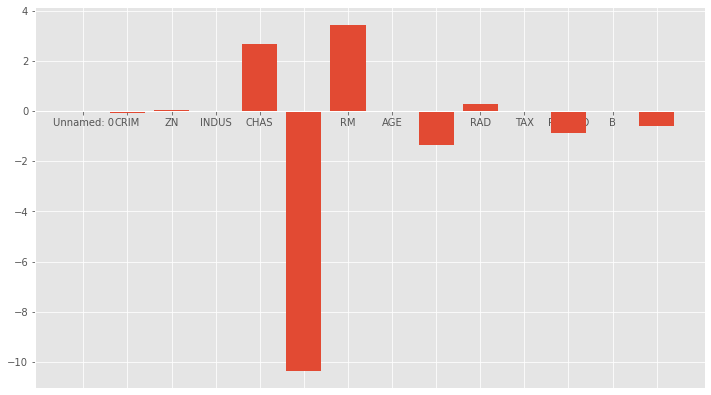

In [ ]:
ploting_the_coef(boston, target='House Price', model=Ridge(alpha=1))

## `6.` Elastic-net regression

In [ ]:
benchmark(insurance, target='charges', model=ElasticNet())

For training data ---------
Mean Absolute Error: 7136.67
Mean Squared Error: 87930955.44
R2 Score: 0.41 

For testing data ---------
Mean Absolute Error: 7414.24
Mean Squared Error: 93257694.97
R2 Score: 0.34


,columns,coefficient
0,Unnamed: 0,-0.000904
1,CRIM,-0.062001
2,ZN,0.060981
3,INDUS,-0.023931
4,CHAS,0.000000
5,NOX,-0.000000
6,RM,0.806876
7,AGE,0.029533
8,DIS,-0.700412
9,RAD,0.312246


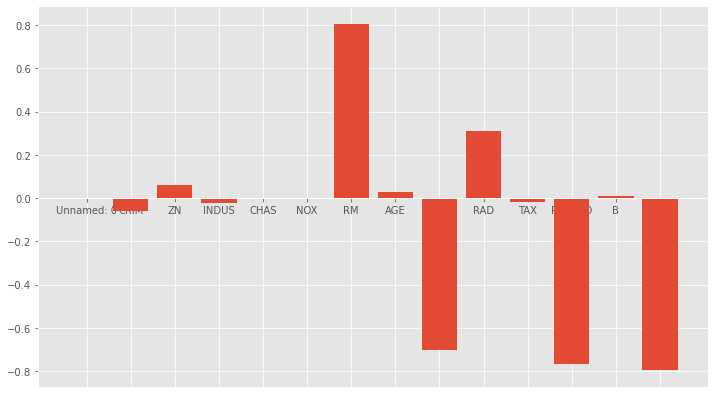

In [ ]:
ploting_the_coef(boston, target='House Price', model=ElasticNet())

## References



1.   [Linear regression: simple steps, find equation, and step](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/)
2. [Linear Regression for Machine Learning](https://machinelearningmastery.com/linear-regression-for-machine-learning/)
2.   [Ridge, Lasso & Polynomial Linear Regression](https://ryanwingate.com/applied-machine-learning/algorithms/ridge-lasso-and-polynomial-linear-regression/)
4. [The Best Guide to Regularization in Machine Learning](https://www.simplilearn.com/tutorials/machine-learning-tutorial/regularization-in-machine-learning#:~:text=and%20variance%20levels-,What%20is%20Regularization%20in%20Machine%20Learning%3F,and%20prevent%20overfitting%20or%20underfitting.)

